<a href="https://colab.research.google.com/github/LiviaAniely/Aplica-es-do-Processamento-de-Linguagem-Natural/blob/main/LiviaA_Contagem_de_Palavras_em_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contagem de palavras em livros

## Descrição

Nesta tarefa, foi feita uma análise de 3 livros.
Foi realizada uma comparação das distribuições de frequências das palavras de cada livro e a verificado se satisfazem a lei de zipf.
Ao final, foi feita a mesma análise para bigramas(conjuntos de 2 palavras) dentro dos livros.

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

## Parte 1: Extrair os 3 livros a partir do link do html deles.

In [ ]:
livro1 = requests.get("https://www.gutenberg.org/files/71316/71316-h/71316-h.htm")
livro2 = requests.get("https://www.gutenberg.org/files/71309/71309-h/71309-h.htm")
livro3 = requests.get("https://www.gutenberg.org/files/71308/71308-h/71308-h.htm")


# É preciso garantir que o encoding dos livros seja padrão
livro1.encoding = 'utf-8'
livro2.encoding = 'utf-8'
livro3.encoding = 'utf-8'

html1 = livro1.text
html2 = livro2.text
html3 = livro3.text

print(html1[0:100])
print(html2[0:100])
print(html3[0:100])



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>
      Tarzan and
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>
      Six Little
<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
    <m


## Parte 2: Retirar as informações HTML dos livros para obter o texto puro da história.

In [ ]:
soup_l1 = BeautifulSoup(html1, 'html.parser')
soup_l2 = BeautifulSoup(html2, 'html.parser')
soup_l3 = BeautifulSoup(html3, 'html.parser')

text_l1 = soup_l1.get_text()
text_l2 = soup_l2.get_text()
text_l3 = soup_l3.get_text()

print(text_l1[0:40])
print(text_l2[0:40])
print(text_l3[0:40])







      Tarzan and the City of Gold 





      Six Little Bunkers at Captai





      Russian Literature | Project


## Parte 3: Pegar os textos dos 3 livros e extrair os tokens deles

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens_l1 = tokenizer.tokenize(text_l1)
tokens_l2 = tokenizer.tokenize(text_l2)
tokens_l3 = tokenizer.tokenize(text_l3)

print(tokens_l1[0:8])
print(tokens_l2[0:8])
print(tokens_l3[0:8])

['Tarzan', 'and', 'the', 'City', 'of', 'Gold', 'Project', 'Gutenberg']
['Six', 'Little', 'Bunkers', 'at', 'Captain', 'Ben', 's', 'Project']
['Russian', 'Literature', 'Project', 'Gutenberg', 'The', 'Project', 'Gutenberg', 'eBook']


## Parte 4: Padronizar os tokens para que todos tenham todas as letras minúsculas(evitar erros ao considerar por exemplo "amigo" != "Amigo").


In [ ]:
words_l1 = [word.lower() for word in tokens_l1]
words_l2 = [word.lower() for word in tokens_l2]
words_l3 = [word.lower() for word in tokens_l3]

print(words_l1[0:8])
print(words_l2[0:8])
print(words_l3[0:8])

['tarzan', 'and', 'the', 'city', 'of', 'gold', 'project', 'gutenberg']
['six', 'little', 'bunkers', 'at', 'captain', 'ben', 's', 'project']
['russian', 'literature', 'project', 'gutenberg', 'the', 'project', 'gutenberg', 'ebook']


## Parte 5: Retirar as "stop words" dos tokens do texto.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
wordssw_l1 =  [word for word in words_l1 if word not in sw]
wordssw_l2 =  [word for word in words_l2 if word not in sw]
wordssw_l3 =  [word for word in words_l3 if word not in sw]

In [ ]:
print(wordssw_l1[0:8])

['tarzan', 'city', 'gold', 'project', 'gutenberg', 'project', 'gutenberg', 'ebook']


## Parte 6: Calcular a frequência de cada palavra em cada um dos 3 livros.

In [ ]:
freqdist_l1 = nltk.FreqDist(wordssw_l1)
freqdist_l2 = nltk.FreqDist(wordssw_l2)
freqdist_l3 = nltk.FreqDist(wordssw_l3)

In [ ]:
freqdist_l1

FreqDist({'tarzan': 706, 'man': 473, 'nemone': 351, 'upon': 283, 'gemnon': 267, 'one': 259, 'would': 221, 'queen': 218, 'ape': 207, 'lion': 191, ...})

In [ ]:
freqdist_l2

FreqDist({'captain': 433, 'ben': 386, 'said': 351, 'russ': 324, 'little': 287, 'bunker': 278, 'rose': 259, 'asked': 215, 'laddie': 215, 'get': 188, ...})

In [ ]:
freqdist_l3

FreqDist({'russian': 716, 'life': 656, 'russia': 437, 'one': 413, 'great': 346, 'pg': 329, 'work': 256, 'time': 244, 'would': 229, 'literature': 228, ...})

## Parte 7: Plotar o gráfico(palavra x frequência) de cada um dos 3 livros.

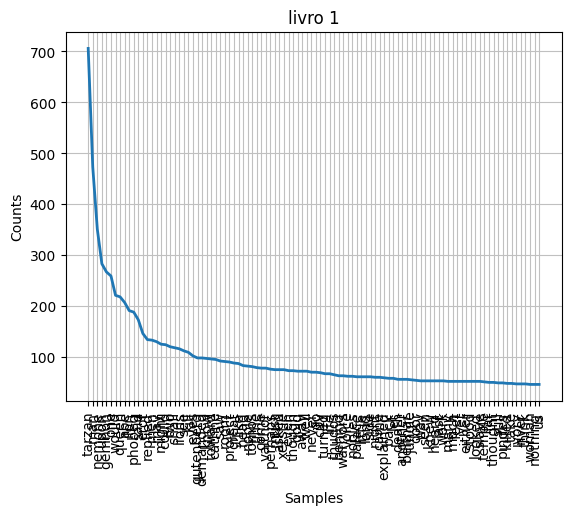

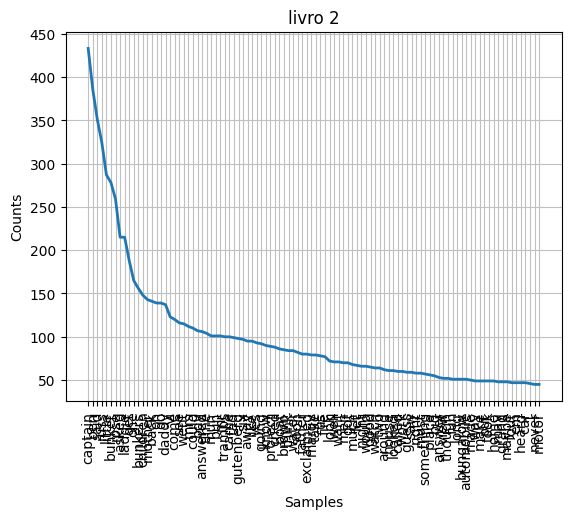

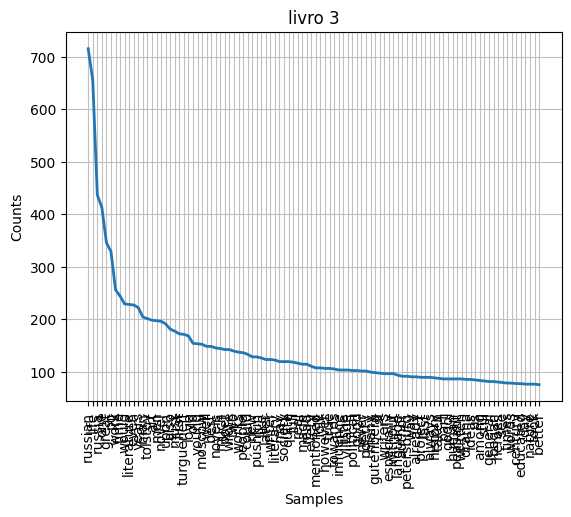

<Axes: title={'center': 'livro 3'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("livro 1")
freqdist_l1.plot(100)

plt.title("livro 2")
freqdist_l2.plot(100)

plt.title("livro 3")
freqdist_l3.plot(100)



## Parte 8: Análise

As 3 distribuições de frequência respeitam a lei de Zipf, que explica que a maioria das palavras têm frequência baixa; de forma contrária, uma minoria das palavras têm frequência alta. Essa constatação é observada pelo formato decrescente não-linear da curva de cada um dos três gráficos.

Os três livros analisados foram:

l1: Tarzan and the city of gold

l2: Six little Bunkers at Captain Ben's

l3: Russian literature

Ao colocar para o gráfico plotar as 10 palavras mais frequentes de cada um dos livros, vê-se que elas de fato possuem relação direta com o tema do livro. Para o livro 1, temos "tarzan", "man","nemone", que fazem parte do livro. Para o livro 2, temos "captain", "ben", que estão no próprio título. E para o livro 3, temos "russian", "life", "russia".

## Parte 9: Análise com bigramas

Extraimos as bigramas do texto(sem as stop words) dos livros; calcula-se então a frequência de cada uma das bigramas e depois plota o gráfico.

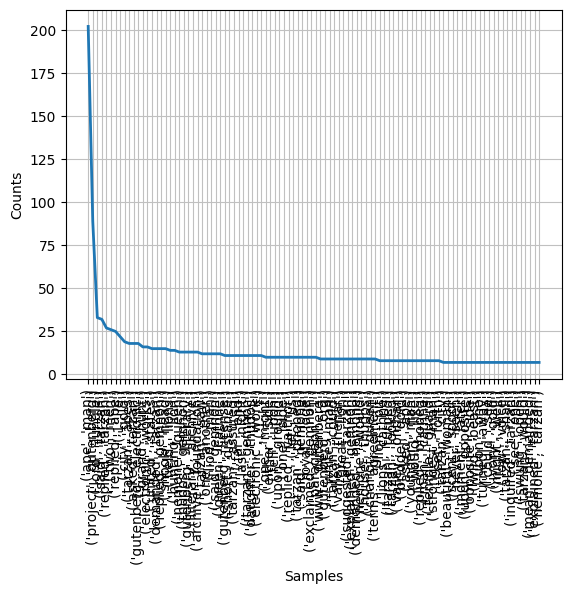

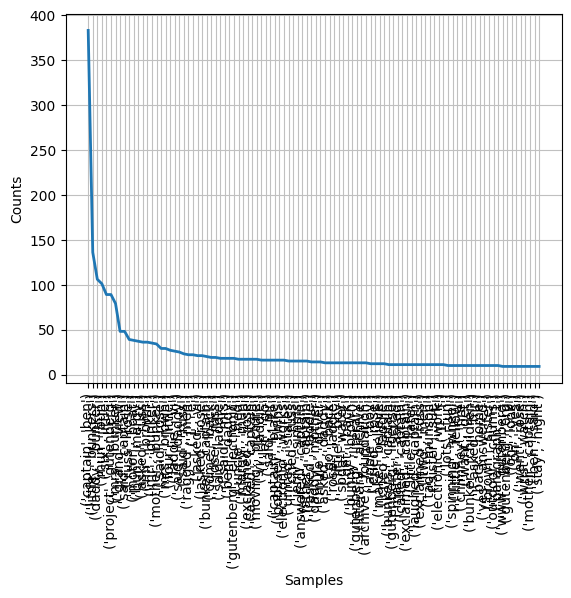

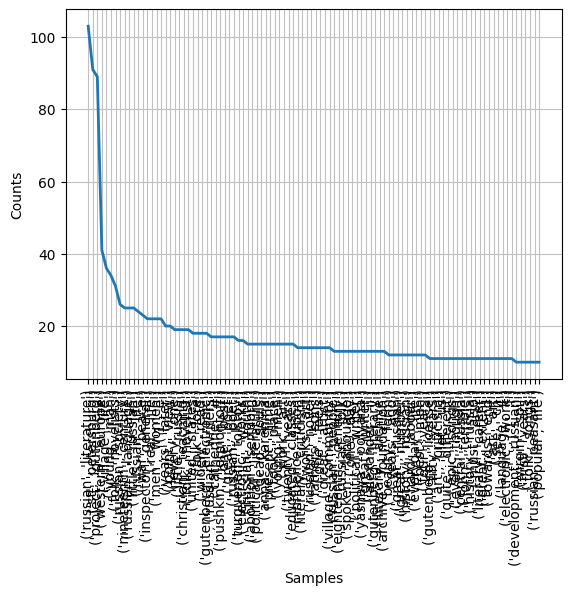

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
bigramas_l1 = list(nltk.bigrams(wordssw_l1))
bigramas_l2 = list(nltk.bigrams(wordssw_l2))
bigramas_l3 = list(nltk.bigrams(wordssw_l3))


freqdist_l1_bgm = nltk.FreqDist(bigramas_l1)
freqdist_l1_bgm.plot(100)

freqdist_l2_bgm = nltk.FreqDist(bigramas_l2)
freqdist_l2_bgm.plot(100)

freqdist_l3_bgm = nltk.FreqDist(bigramas_l3)
freqdist_l3_bgm.plot(100)

## Parte 10: Análise da contagem com bigramas

Observando as 10 primeiras bigramas com maior frequência nos 3 gráficos, vemos que nos 3 livros, algumas podem não ter tanto significado para entender o livro como ("two", "men"), ("six","litte") e ("young","man"), porém a maioria tem a ver com a história a exemplo de ("project","gutenberg"), ("captain","ben") e ("russian","literature").

Mais uma vez, os gráficos respeitam a lei de Zipf, já que a partir de uma curva decrescente, vemos que a maioria das bigramas tem baixa frequência, e uma minoria delas tem alta frequência.